# Downsampling Seismograms
The following script shows how to downsample a seismogram. Currently, a simple integer decimation is supported. If not explicitly disabled, a low-pass filter is applied prior to decimation in order to prevent aliasing. For comparison, the non-decimated but filtered data is plotted as well. Applied processing steps are documented in trace.stats.processing of every single Trace. Note the shift that is introduced because by default the applied filters are not of zero-phase type. This can be avoided by manually applying a zero-phase filter and deactivating automatic filtering during downsampling (no_filter=True).

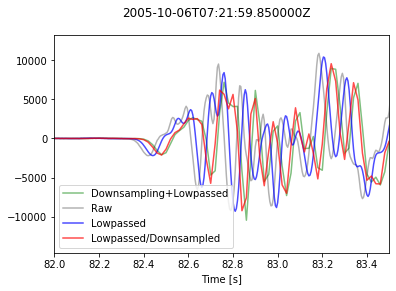

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import obspy

# Read the seismogram
st = obspy.read("https://examples.obspy.org/RJOB_061005_072159.ehz.new")

# There is only one trace in the Stream object, let's work on that trace...
tr = st[0]

# Decimate the 200 Hz data by a factor of 4 to 50 Hz. Note that this
# ***automatically*** includes a lowpass ***filtering with corner frequency 20 Hz***.
# We work on a copy of the original data just to demonstrate the effects of
# downsampling.
#factor = Factor by which the sampling rate is lowered by decimation.
#no_filter = Deactivates automatic filtering if set to True. Defaults to False.
#strict_length = Leave traces unchanged for which end time of trace would change. Defaults to False.
tr_new = tr.copy()
tr_new.decimate(factor=4, strict_length=False)

# For comparison also only filter the original data (same filter options as in
# automatically applied filtering during downsampling, corner frequency
# 0.4 * new sampling rate) <<<--- to filter with corner f 20 as downsampling
tr_filt = tr.copy()
tr_filt.filter('lowpass', freq=0.4 * tr.stats.sampling_rate / 4.0)

# Now let's plot the raw and filtered data...
#stats.delta = Sample distance in seconds (default value is 1.0)
#in this case tr_new.stats.delta=0.02 <<<--- from 1/50
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
t_new = np.arange(0, tr_new.stats.npts / tr_new.stats.sampling_rate,
                  tr_new.stats.delta)

#Lowpassed filter after downsampling
tr_filt_2 = tr_new.copy()
tr_filt_2.filter('lowpass', freq=20.0)

plt.plot(t_new, tr_filt_2.data, 'g', label='Downsampling+Lowpassed', alpha=0.5)

plt.plot(t, tr.data, 'k', label='Raw', alpha=0.3)
plt.plot(t, tr_filt.data, 'b', label='Lowpassed', alpha=0.7)
plt.plot(t_new, tr_new.data, 'r', label='Lowpassed/Downsampled', alpha=0.7)

plt.xlabel('Time [s]')
plt.xlim(82, 83.5)
plt.suptitle(tr.stats.starttime)
plt.legend()
plt.show();